In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = data[["Annual Income (k$)", "Spending Score (1-100)"]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
k = 5
centroids = x.sample(k).values
while True:
    EuclidianDistance = np.sqrt(((x.values - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(EuclidianDistance, axis=0)
    updated_centroids = np.array([x.values[labels == i].mean(axis=0) for i in range(k)])
    if np.allclose(centroids, updated_centroids):
        break
    centroids = updated_centroids

centroids

array([[55.0875    , 49.7125    ],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [87.75      , 17.58333333]])

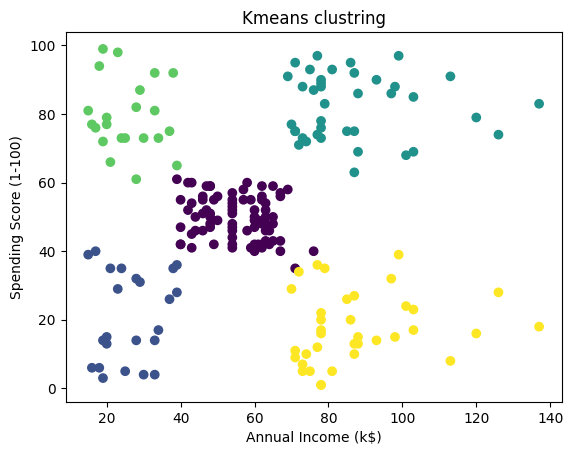

In [5]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=labels)
plt.title('Kmeans clustring')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()